In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import mailbox
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dmail = mailbox.mbox("Deliveroo.mbox")

In [4]:
merged_list = []
mails = []
restaurant = []
date = []
rtime = []
dtime = []
tip = []

In [5]:
def clean_list(dmail):
    for message in dmail:
        if message["subject"].split()[0] == 'Order':
            mails.append(message)
        else:
            continue 
    return mails

In [6]:
def clean_dtime(dtime):
    lex = dtime.split()
    lex = [lex[0].replace("m", ""), lex[1].replace("s", "")]
    return int(lex[0])*60 + int(lex[1])

In [7]:
def parse_mails(mails):
    for message in mails:
        body = str(message.get_payload())
        restaurant.append(body.partition("Restaurant:")[2].partition("\r\nRest")[0].strip())
        date.append(str.split(body.partition("at:")[2].partition("\r\nDel")[0])[0])
        rtime.append(str.split(body.partition("at:")[2].partition("\r\nDel")[0])[1])
        bad_dtime = body.partition("Time:")[2].partition("\r\n\r\n")[0].strip()
        good_dtime = clean_dtime(bad_dtime)
        dtime.append(good_dtime)
        
        tip.append(float(body.partition("Tip:")[2].partition("\r\n\r\n")[0].strip()))
        
    return [date, rtime, restaurant, dtime, tip]

In [8]:
dtime = []

def sectomin(seconds):
    for delivery_time in seconds:
        m, s = divmod(delivery_time, 60)
        dtime.append(datetime.time(0, m, s))
    return dtime

In [9]:
def clean_datetime(df):
    dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in df["Date"]]
    times = [datetime.datetime.strptime(tim, "%H:%M:%S").time() for tim in df["Time"]]
    df["Date"] = dates
    df["Time"] = times
    
    return df

In [10]:
mails = clean_list(dmail)
[date, rtime, restaurant, dtime, tip] = parse_mails(mails)
merged_list = list(zip(*[date, rtime, restaurant, dtime, tip]))

In [11]:
df = pd.DataFrame(merged_list, columns=['Date', 'Time', 'Restaurant', 'Delivery Time (s)', 'Tip'])
df = df[df["Delivery Time (s)"] < 3000]
df = clean_datetime(df)

In [13]:
df

Date      Time                              Restaurant  \
0   2016-01-31  18:17:24                               Civerinos   
1   2016-01-28  18:36:57                                Mariachi   
2   2016-01-28  18:55:13                       10 To 10 In Delhi   
3   2016-01-28  19:44:34                               Lebowskis   
4   2016-01-28  20:08:11                                Ola Kala   
5   2016-01-28  20:35:30                        Harajuku Kitchen   
6   2016-01-28  21:14:39                                 Sushiya   
7   2016-01-29  18:18:07                            The Southern   
8   2016-01-29  18:51:10                  Wagamama - City Centre   
9   2016-01-29  19:24:51                            Zizzi - Quay   
10  2016-01-29  19:42:26                               Aji Sushi   
11  2016-01-29  20:10:10                                Ola Kala   
12  2016-01-29  20:38:28                                  Ignite   
13  2016-01-29  21:13:12                            Guchhi India   
14  2016-01-31  17:52:21                             Wannaburger   
15  2016-01-31  18:49:13                 ASK Italian - Edinburgh   
16  2016-01-31  19:15:38              YO! Sushi - Princes Street   
17  2016-01-31  19:37:32      Gourmet Burger Kitchen - Edinburgh   
18  2016-01-31  20:13:17                  Wagamama - City Centre   
19  2016-01-31  20:40:04                 Pomegranate - Edinburgh   
20  2016-01-31  21:08:09      Gourmet Burger Kitchen - Edinburgh   
21  2016-01-31  21:19:37                        The Olive Branch   
22  2016-02-05  18:03:38                                Mariachi   
23  2016-02-05  18:53:23                                 Hanam's   
24  2016-02-05  19:22:31                               Aji Sushi   
25  2016-02-05  20:31:56                                   Zuhus   
26  2016-02-05  20:58:02                                 Sushiya   
27  2016-02-05  22:01:49            The Whistle Stop Barber Shop   
28  2016-02-06  17:41:58      Gourmet Burger Kitchen - Edinburgh   
29  2016-02-06  18:05:57                                Ola Kala   
..         ...       ...                                     ...   
664 2016-08-12  17:54:56                                 Sushiya   
665 2016-08-12  18:24:06                       Byron - Edinburgh   
666 2016-08-15  19:45:56                             Greenmantle   
667 2016-08-12  19:12:54              Taco Mazama - Lothian Road   
668 2016-08-12  19:34:22                    Byron - Lothian Road   
669 2016-08-12  19:57:03                                Ola Kala   
670 2016-08-12  20:20:38                       Byron - Edinburgh   
671 2016-08-12  20:40:22                                 Sushiya   
672 2016-08-19  21:17:50                  Zizzi - Roxburgh Court   
673 2016-08-12  21:35:49                             Indigo Yard   
674 2016-08-12  22:03:03       1851 - Northbridge - PizzaExpress   
675 2016-08-12  22:15:22                                 Sushiya   
676 2016-08-12  22:35:05                                   Zuhus   
677 2016-08-15  18:03:19                             Tutto Matto   
678 2016-08-19  20:49:08  3311 - George IV Bridge - PizzaExpress   
679 2016-08-15  18:56:53       3351 - Morningside - PizzaExpress   
680 2016-08-15  19:28:15                              Rigatoni's   
681 2016-08-19  20:01:26                       Byron - Edinburgh   
682 2016-08-15  20:12:28                           Indian Lounge   
683 2016-08-15  21:15:44                                   Zuhus   
684 2016-07-25  19:23:14                  BURGER. Fountainbridge   
685 2016-08-19  18:45:34                                 Sushiya   
686 2016-08-19  19:11:56                                 Sushiya   
687 2016-08-19  22:03:27                   Bar Italia Ristorante   
688 2016-08-19  19:34:28                                 Sushiya   
690 2016-06-27  18:46:46                       Byron - Edinburgh   
691 2016-08-19  20:26:32                     The City Restaurant  

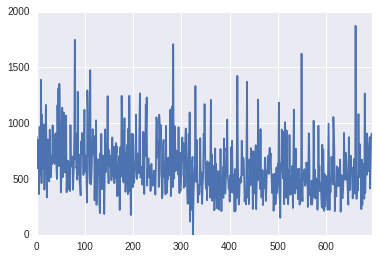

In [14]:
df["Delivery Time (s)"].plot()
m, s = divmod(df["Delivery Time (s)"].mean(), 60)
#print("{}:{}".format(m,s ))

196.0

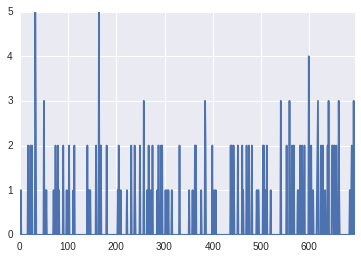

In [15]:
df["Tip"].plot()
df["Tip"].sum()

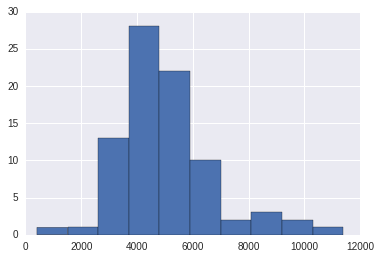

In [16]:
df.groupby(["Date"]).sum()["Delivery Time (s)"].hist()

/home/ruski/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


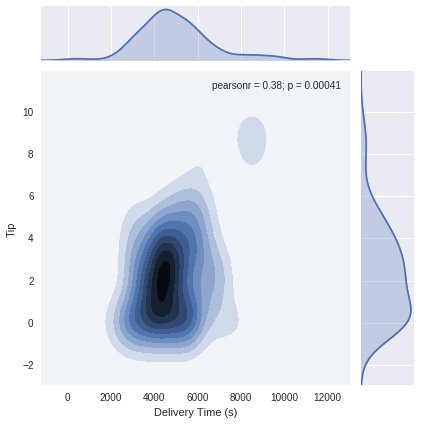

In [17]:
day_dtime_plot = df.groupby(["Date"]).sum()
day_dtime_plot
sns.jointplot(x = day_dtime_plot["Delivery Time (s)"], y = day_dtime_plot["Tip"], kind = "kde")

In [18]:
df.groupby(["Date"]).mean().max()

Delivery Time (s)    916.6
Tip                    1.0
dtype: float64

In [19]:
rest_day = df.groupby(["Restaurant"]).mean()

In [20]:
rest_day_mean = rest_day["Tip"].mean().max()
rest_day_mean
#sns.kdeplot(rest_day_mean)

AttributeError: 'float' object has no attribute 'max'

In [ ]:
df.groupby(["Delivery Time (s)"])["Tip"]